In [1]:
import numpy as np
import pandas as pd
import os
from functools import reduce

In [2]:
dataset_dir="D:/bglp/dataset/csv"

#### Function to read from CSV and resample

In [3]:
def resample_csv(file_name):
    df = pd.read_csv(dataset_dir +  "/" + file_name, parse_dates =["ts"])
   
    # Drop Unamed column
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    if 'meal_type' in df.columns:
        #Encode Meal Type
        df['meal_type'] = df['meal_type'].replace(['Breakfast','Lunch','Dinner','Snack','HypoCorrection'],[0,1,2,3,4])
    
    # Resample the data
    df = df.resample('H', on="ts").mean().fillna(method='ffill')
    
    # Create Directory if not present
    new_filename = dataset_dir + "/resampled/" + file_name
    os.makedirs(os.path.dirname(new_filename), exist_ok=True)
    
    # Write to CSV File
    df.to_csv(new_filename, header=True)

    return df

#### Resample dataset based on Timestamp

In [4]:
glucose_level_df=resample_csv("glucose_level.csv")
meal_df=resample_csv("meal.csv")
acceleration_df=resample_csv("acceleration.csv")
basal_df=resample_csv("basal.csv")
basis_gsr_df=resample_csv("basis_gsr.csv")
basis_skin_temperature_df=resample_csv("basis_skin_temperature.csv")
finger_stick_df=resample_csv("finger_stick.csv")

#### Perform an outer join to merge all Dataframes

In [5]:
dfs = [glucose_level_df, meal_df, acceleration_df, basal_df, basis_gsr_df, basis_skin_temperature_df, finger_stick_df]
df_final = reduce(lambda left,right: pd.merge(left,right,on='ts'), dfs)

#### Write merged Dataframe to CSV

In [6]:
# Create Directory if not present
new_filename = dataset_dir + "/merged.csv"
os.makedirs(os.path.dirname(new_filename), exist_ok=True)

# Write to CSV File
df_final.to_csv(new_filename, header=True)

In [7]:
print(df_final.head())

                     glucose_level_val  meal_type  meal_carbs  \
ts                                                              
2027-02-06 08:00:00         142.555556        0.0        37.0   
2027-02-06 09:00:00         180.833333        0.0        37.0   
2027-02-06 10:00:00         203.500000        0.0        37.0   
2027-02-06 11:00:00         165.500000        0.0        37.0   
2027-02-06 12:00:00         141.000000        1.0        72.0   

                     acceleration_val  basal_val  basis_gsr_val  \
ts                                                                
2027-02-06 08:00:00          0.878088        1.5       0.018000   
2027-02-06 09:00:00          0.862455        1.5       0.026504   
2027-02-06 10:00:00          0.948024        1.5       0.025237   
2027-02-06 11:00:00          1.028526        1.0       0.085956   
2027-02-06 12:00:00          1.026401        1.0       0.139798   

                     basis_skin_temperature_val  finger_stick_val  
ts    

In [8]:
print(df_final.columns)

Index(['glucose_level_val', 'meal_type', 'meal_carbs', 'acceleration_val',
       'basal_val', 'basis_gsr_val', 'basis_skin_temperature_val',
       'finger_stick_val'],
      dtype='object')


#### Import Modules for Plotting Graphs

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#### Plot the Correlaton Matrix

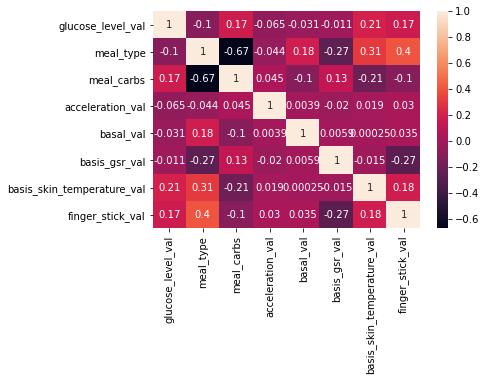

In [10]:
correlation_mat = df_final.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [11]:
# Plot Graphs for a given day i.e. '2027-02-06'
df_filtered = df_final.loc['2027-02-06':'2027-02-06']

#### Consolidated Graph

In [12]:
x=df_filtered.index
y1=df_filtered["glucose_level_val"]
y2=df_filtered["basis_gsr_val"]
y3=df_filtered["basal_val"]
y4=df_filtered["finger_stick_val"]
y5=df_filtered["basis_skin_temperature_val"]

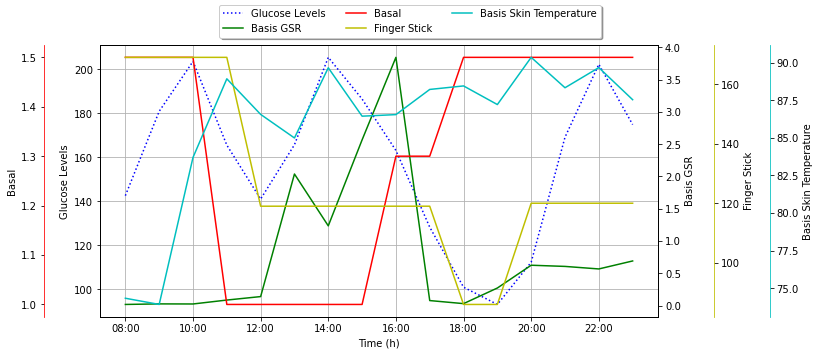

In [13]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax3 = ax1.twinx()
ax3.yaxis.tick_left()
rspine3 = ax3.spines['left']
rspine3.set_position(('axes', -0.10))
rspine3.set_color('r')
ax3.yaxis.set_label_position("left")

ax4 = ax3.twinx()
ax4.yaxis.tick_right()
rspine4 = ax4.spines['right']
rspine4.set_position(('axes', 1.1))
rspine4.set_color('y')
ax4.yaxis.set_label_position("right")

ax5 = ax3.twinx()
ax5.yaxis.tick_right()
rspine5 = ax5.spines['right']
rspine5.set_position(('axes', 1.2))
rspine5.set_color('c')
ax5.yaxis.set_label_position("right")

ax1.grid()

# Set Axis Labels
ax1.set_xlabel("Time (h)")
ax1.set_ylabel(r"Glucose Levels")
ax2.set_ylabel(r"Basis GSR")
ax3.set_ylabel(r"Basal")
ax4.set_ylabel(r"Finger Stick")
ax5.set_ylabel(r"Basis Skin Temperature")

l1=ax1.plot(x, y1, label="Glucose Levels", color='b', linestyle=':')
l2=ax2.plot(x, y2, label="Basis GSR", color='g')
l3=ax3.plot(x, y3, label="Basal", color='r')
l4=ax4.plot(x, y4, label="Finger Stick", color='y')
l5=ax5.plot(x, y5, label="Basis Skin Temperature", color='c')

# Format Datetime in X Axis
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

# Display Legends
lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels,loc="upper center",
           ncol=3, shadow=True, fancybox=True)

plt.show()